Imagem Original


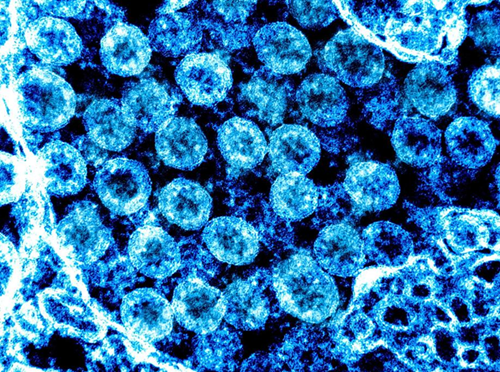

Imagem equalizada


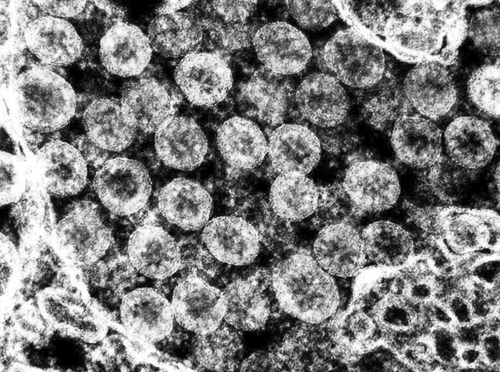

Imagem Otsu
Limiar (threshold) calculado por Otsu: 126.0


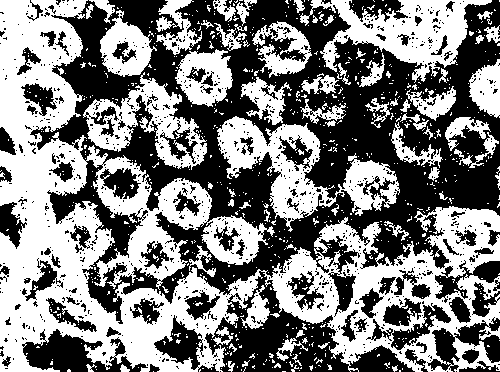

Otsu -> Gauss


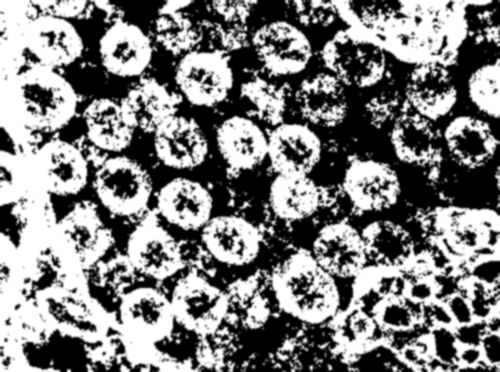

Gauss -> Lap


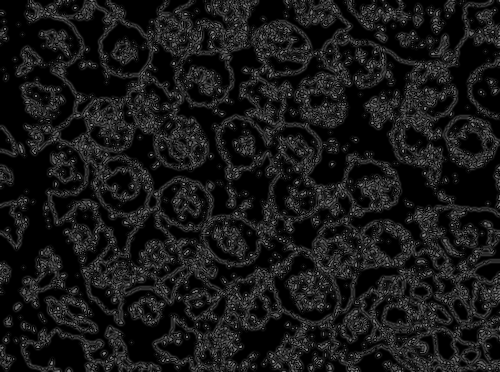

lap1 -> Erosao


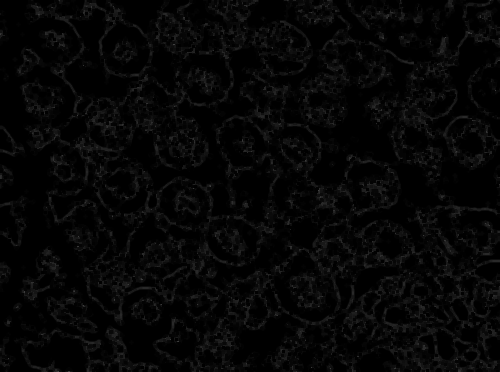

Erosao -> Gauss


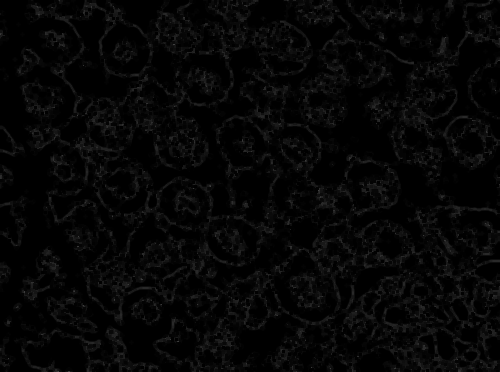

Gauss -> Otsu
Limiar (threshold) calculado por Otsu: 11.0


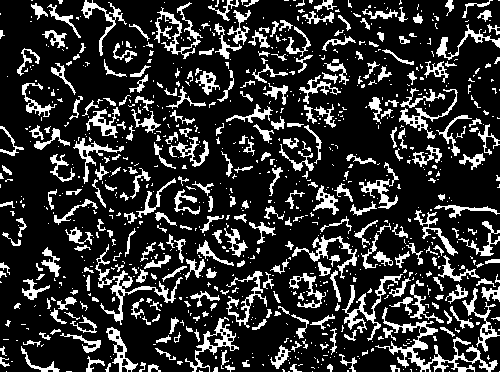

Erosao -> Sobel


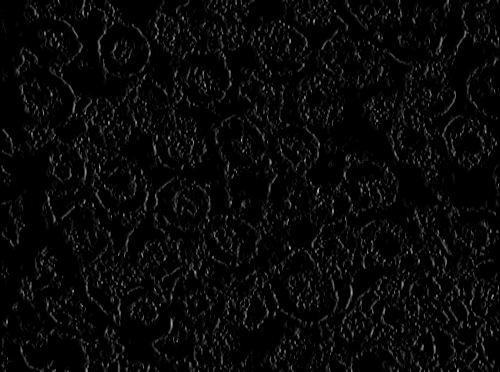

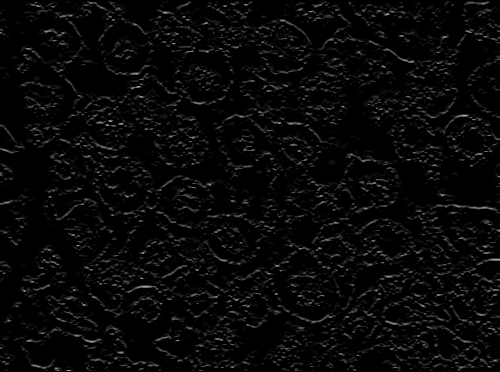

Gauss2 -> Sobel


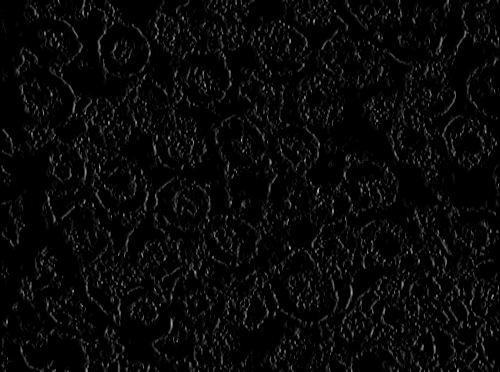

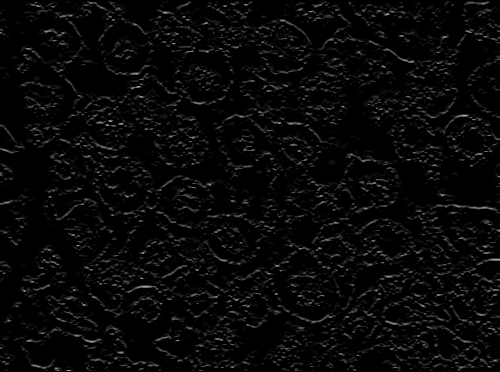

SobelX + SobelY -> Combinação


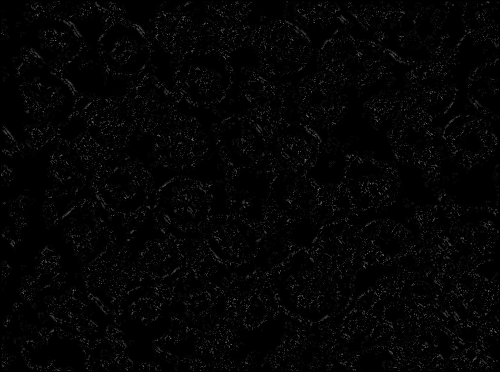

/usr/local/lib/python3.12/dist-packages/google/colab/patches/__init__.py:18: RuntimeWarning: invalid value encountered in cast
  a = a.clip(0, 255).astype('uint8')


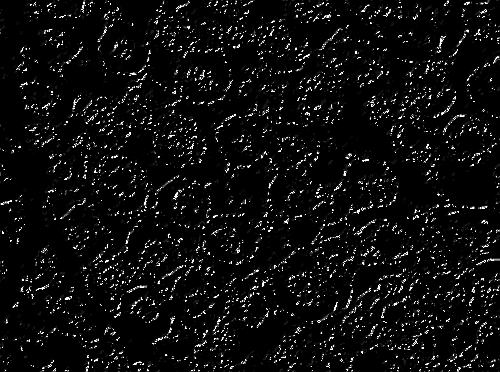

In [1]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt


image = cv.imread('/content/sample_data/COVID.png')
kernel = np.ones((3,3), np.uint8)

print("Imagem Original")
cv2_imshow(image)


gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)



#imagem equalizada
print("Imagem equalizada")
img_equalizada = cv.equalizeHist(gray)
cv2_imshow(img_equalizada)

#imagem ostu
print("Imagem Otsu")

ret, img_otsu = cv.threshold(img_equalizada, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
print(f'Limiar (threshold) calculado por Otsu: {ret}')
cv2_imshow(img_otsu)

#pré-filtro para passa alta (gauss)
print("Otsu -> Gauss")
suave = cv.GaussianBlur(img_otsu, (5,5), 1)
cv2_imshow(suave)

#laplaciano
print("Gauss -> Lap")
lap = cv.Laplacian(suave,cv.CV_64F)
lap = np.uint8(np.absolute(lap))
cv2_imshow(lap)


#laplaciano


print("lap1 -> Erosao")
erosao = cv.erode(lap, kernel, iterations=1)
cv2_imshow(erosao)

print("Erosao -> Gauss")
suave2 = cv.GaussianBlur(erosao, (1,1), 0)
cv2_imshow(suave2)

print("Gauss -> Otsu")
ret, otsu3 = cv.threshold(suave2, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
print(f'Limiar (threshold) calculado por Otsu: {ret}')
cv2_imshow(otsu3)



#sobel componentes
print("Erosao -> Sobel")
sobelx = cv.Sobel(erosao, cv.CV_64F, 1, 0)
sobely = cv.Sobel(erosao, cv.CV_64F, 0, 1)
cv2_imshow(sobelx)
cv2_imshow(sobely)

#sobel componentes a partir do Laplaciano
print("Gauss2 -> Sobel")
sobelx1 = cv.Sobel(suave2, cv.CV_64F, 1, 0)
sobely1 = cv.Sobel(suave2, cv.CV_64F, 0, 1)
cv2_imshow(sobelx1)
cv2_imshow(sobely1)

#combinação de SobelX + SobelY com porta lógica
print("SobelX + SobelY -> Combinação")
combinado_sobel1 = cv.bitwise_and(sobelx, sobely)
combinado_sobel2 = cv.bitwise_or(sobelx, sobely)
cv2_imshow(combinado_sobel1)
cv2_imshow(combinado_sobel2)
